### Case Study Scenario
- The actual concrete compressive strength (MPa) is the most important measure of performance used by civil engineers while designing and building structures
- The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate

### Objective:
Modeling of strength of high performance concrete using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
concrete = pd.read_csv('concrete.csv')

#### Initial Data Inspection

In [3]:
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
concrete.shape

(1030, 9)

In [5]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


##### Observations
- There are 9 columns and 1030 rows
- All columns are numeric
- 'strength' column is our target variable
- There are no null values present, however there are 0s present which may represent missing and must be inspected

##### Attribute Information:
   - Cement : measured in kg in a m3 mixture
   - Blast furnace Slag : measured in kg in a m3 mixture
   - Fly ash : measured in kg in a m3 mixture
   - Water : measured in kg in a m3 mixture
   - Superplasticizer : measured in kg in a m3 mixture
   - Coarse Aggregate : measured in kg in a m3 mixture
   - Fine Aggregate : measured in kg in a m3 mixture
   - Age : day (1~365)
   - Concrete compressive strength measured in MPa

##### Age

Concrete hardens with time and strength increases. Usually, concrete is tested after 28 days.

##### Fly ash and slag

Both features can be considered as binder together with cement. Both increase strength and durability of concrete. However, the hardening process takes longer and therefore it requires more time to reach full compressive strength.

##### Superplasticizer

Superplasticizer are used to ensure better flow properties because they minimize particle segregation. Further, they allow to decrease the water-cement ratio which leads to higher compressive strength.



In [6]:
## Checking for duplicates
concrete.duplicated().sum()

25

In [7]:
concrete[concrete.duplicated()].sort_values('strength')

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
943,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
884,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
830,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
933,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
576,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90


##### Observations:
- There are 25 duplicated rows in the dataset
- While testing in the laboratory, multiple structures from the same concrete are often tested for compression strength which may be resulting in duplicating rows in the dataset
- Since these probably represent different test concrete structures, their presence further enforces the general trend that the variables contribute to these records. Hence we should retain them in the dataset as it is valuable information

### Exploratory Data Anlaysis
- Univariate Analysis
- Bivariate Analysis
- Analysing Target Column
- Analysing Zero values in Ash, Slag and Superplastic Column

#### Univariate Analysis

In [8]:
## Summary Statistics
concrete.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


##### Observations
- Slag, Ash and Superplastic have at least 25% values as Zero. This may represent missing values and needs to be investigated
- The columns have different scales and would need to be scaled

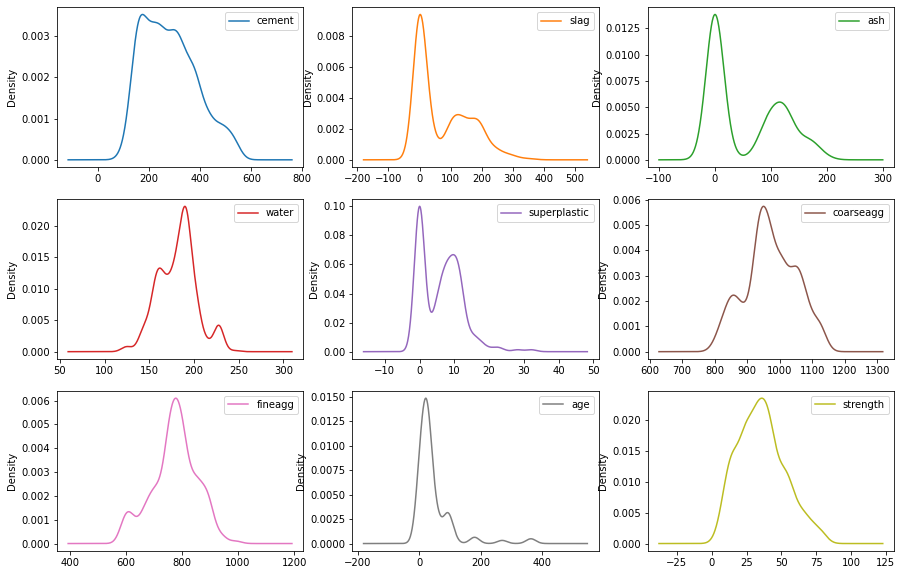

In [9]:
## Distribution Plots
concrete.plot.kde(subplots =True, layout = (3,3), figsize = (15,10), sharex=False);

##### Observation :
 - Many variables have more than one peak in the kde plots. May represent mixing of Gaussians in the data

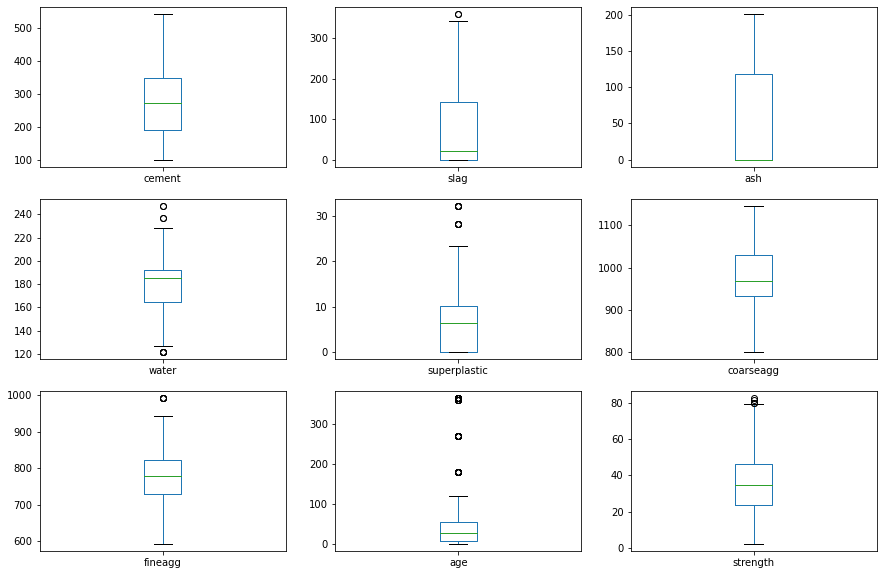

In [10]:
## Box Plot Distribution Charts
concrete.plot.box(subplots =True, layout = (3,3), figsize = (15,10), sharex=False);

##### Observation:
- Some Outliers are present in 'Age' and 'Strength'
- Slag and Ash have 50% of values close to Zero

#### Bivariate Analysis

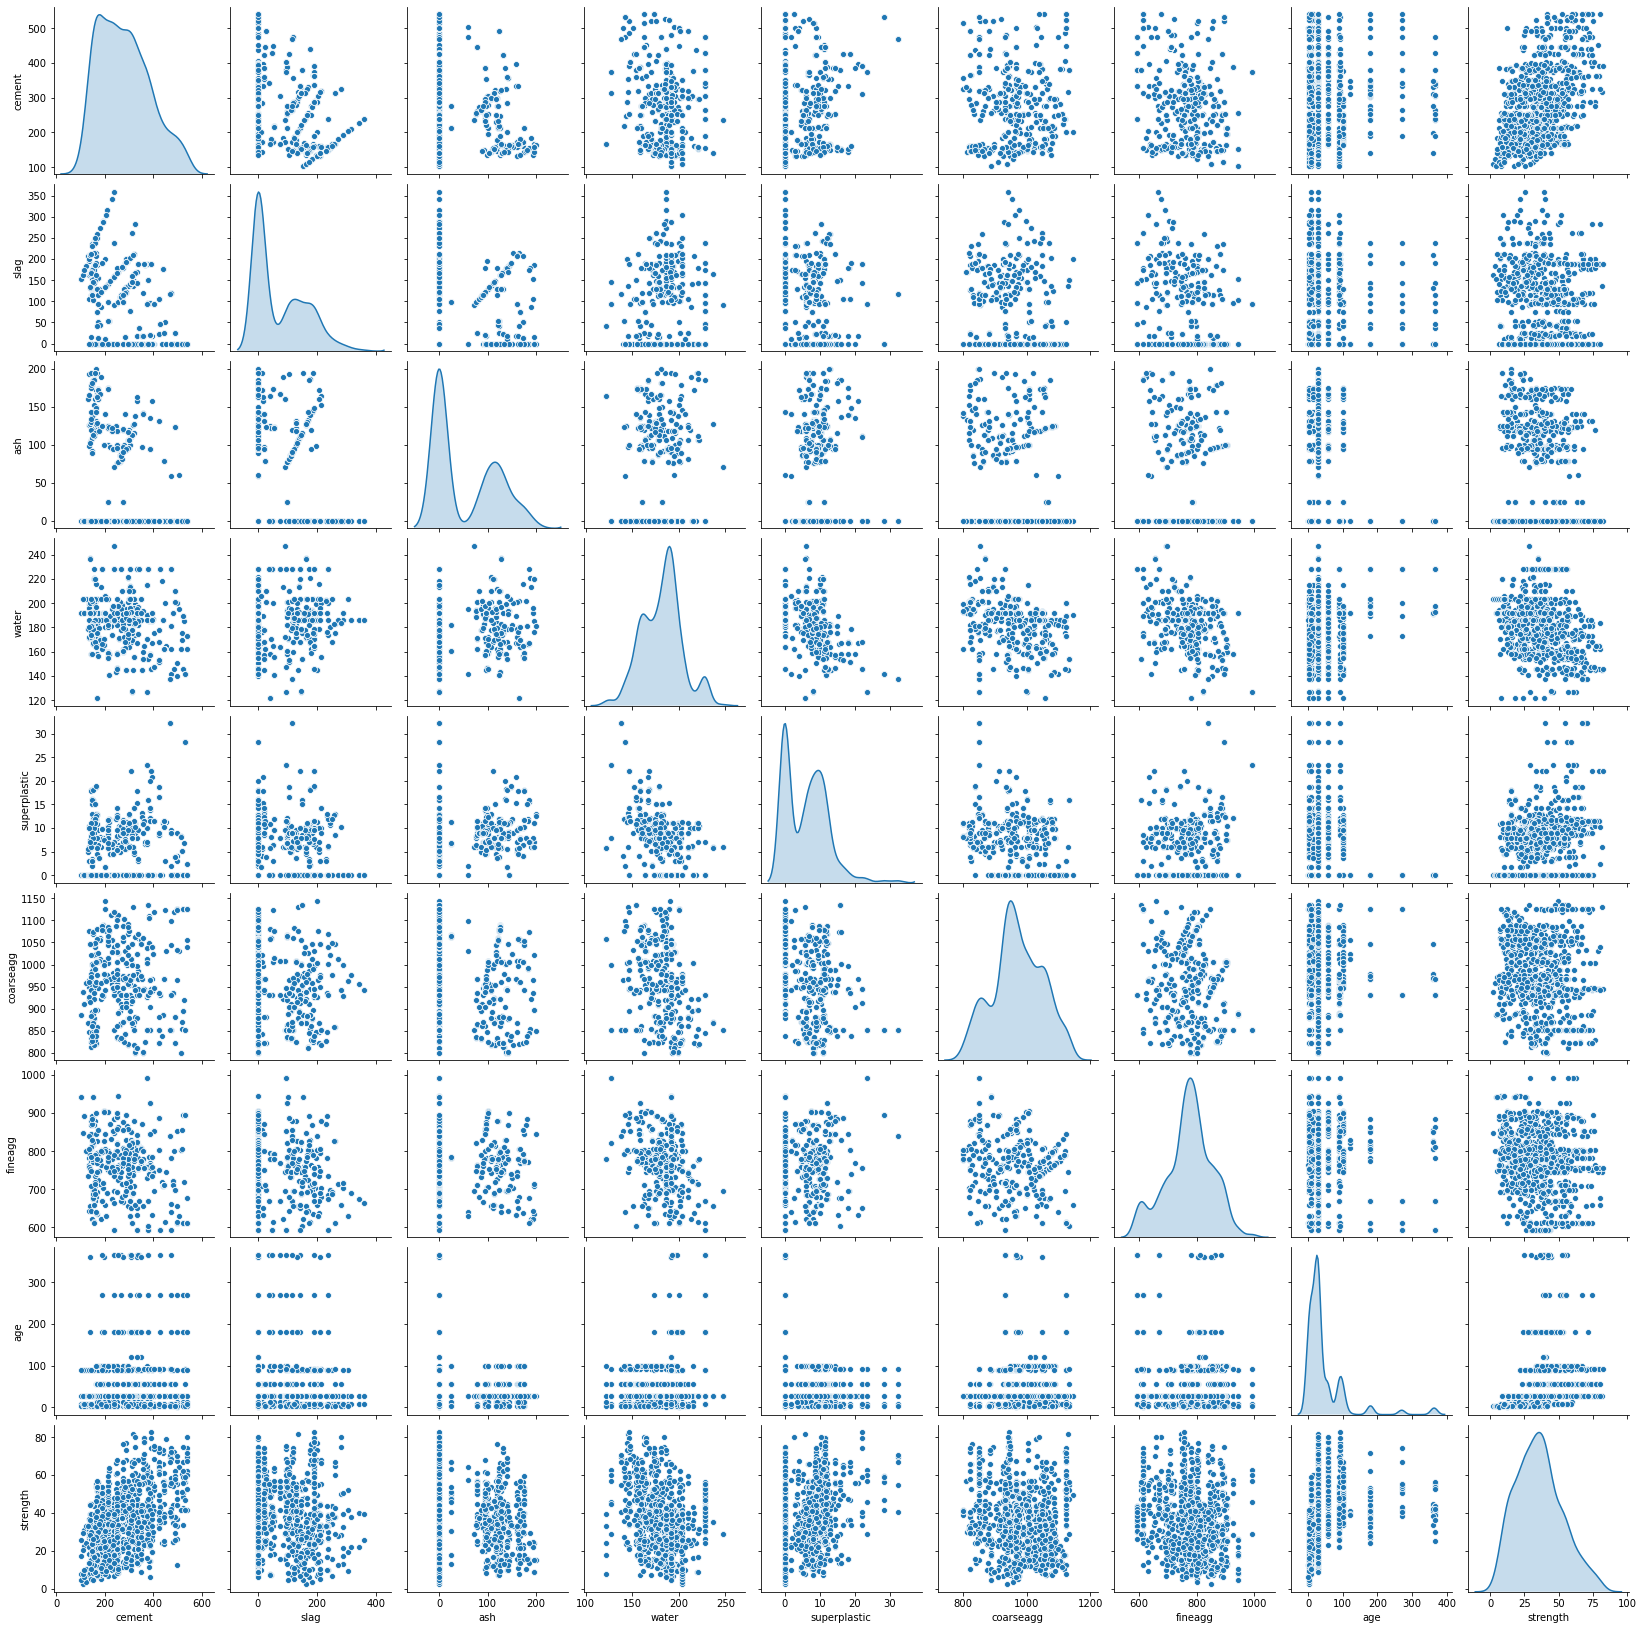

In [11]:
sns.pairplot(concrete, diag_kind='kde');

##### Observations:
- Cement,Strength and Water,Superplastic seem to be linearly correlated
- The remaining variables don't show much correlation among them. We should look at Pearson's correlation coefficient to understand this better
- Age variable shows varying strength for different range buckets. Features can be engineered by binning this column

In [12]:
## Correlation Matrix 
concrete.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


##### Observation:
 - It is evident from above that most variables are not highly correlated with one another as well as the target variable 'Strength'
 - Since linear correlation is less, we might have to use non linear methods of modelling for better predictions


#### Analysing Target Column

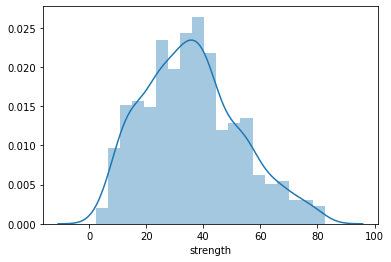

In [13]:
sns.distplot(concrete['strength']);

In [14]:
concrete['strength'].describe()

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: strength, dtype: float64

##### Observation:
 - The target column is normally distributed
 - As seen above, there are no outliers present in target column
 - Target column is linearly correlated with 'cement' and very weakly correlated with the remaining variables

#### Analysing Zero values in Slag, Ash and Superplastic

In [3]:
print("Total Rows: ", concrete.shape[0])
print("Number of Zeroes in Slag: ",(concrete['slag']==0).sum())
print("Number of Zeroes in Ash: ",(concrete['ash']==0).sum())
print("Number of Zeroes in Superplastic: ",(concrete['superplastic']==0).sum())
print("Number of Zeroes in Slag and Ash: ",((concrete['slag']==0)&(concrete['ash']==0)).sum())
print("Number of Zeroes in Slag and Superplastic: ",((concrete['slag']==0)&(concrete['superplastic']==0)).sum())
print("Number of Zeroes in Ash and Superplastic: ",((concrete['ash']==0)&(concrete['superplastic']==0)).sum())
print("Number of Zeroes in Ash,Slag and Superplastic: ",((concrete['ash']==0)&(concrete['superplastic']==0)&(concrete['slag']==0)).sum())

Total Rows:  1030
Number of Zeroes in Slag:  471
Number of Zeroes in Ash:  566
Number of Zeroes in Superplastic:  379
Number of Zeroes in Slag and Ash:  232
Number of Zeroes in Slag and Superplastic:  215
Number of Zeroes in Ash and Superplastic:  373
Number of Zeroes in Ash,Slag and Superplastic:  209


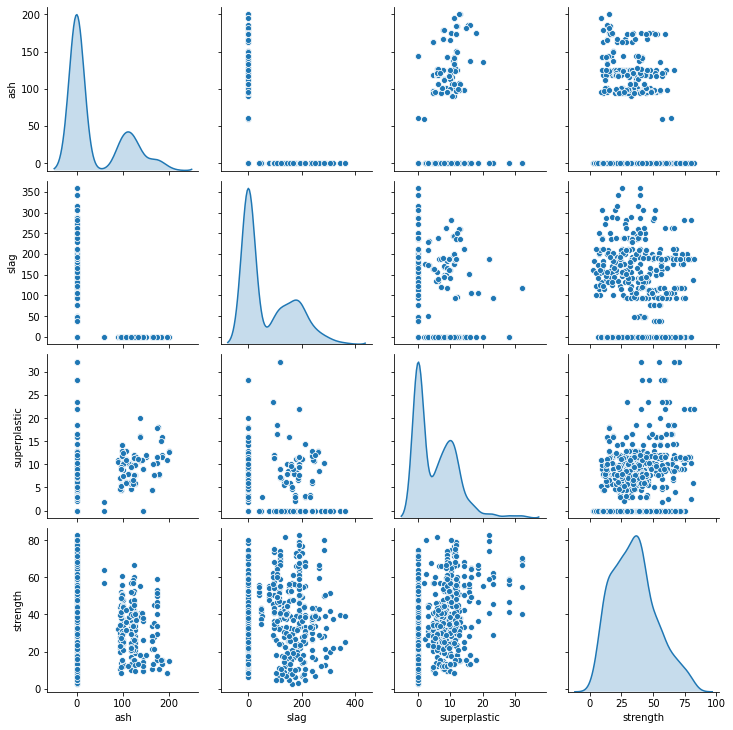

In [4]:
zero_cols  = concrete[(concrete['ash']==0)|(concrete['superplastic']==0)|(concrete['slag']==0)][['ash','slag','superplastic','strength']]
sns.pairplot(zero_cols, diag_kind = 'kde')

##### Observation:
 - There is not much overlap or correlation in records with Zero values for Slag, Ash and Superplastic
 - Since a large number of records are zero for the above 3 columns, we should not remove them or impute them, as that would skew the distributions drastically
 - Applying non linear algorithms for prediction could be tried

### 3. Feature Engineering 
Based on data exploration as well as reading about concrete strength and factors affecting the same, we can introduce the follwing new features using the available dataset - 
 - Applying Clustering 
 - Bucketing Age Variable
 - Ratios 
   1. Water to cement
   2. Water to binder
   3. Superplasticizer to binder

(Binder in this case would be Ash and Slag)

#### Clustering 

In [5]:
## Scaling data for K Means Clustering 
from sklearn.cluster import KMeans
from scipy.stats import zscore
concrete_scaled = concrete.drop(['strength'], axis =1).apply(zscore)

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

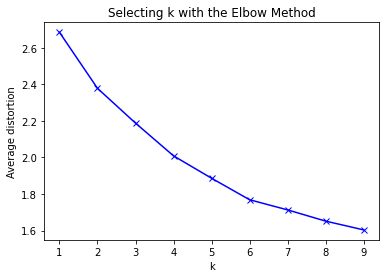

In [6]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(concrete_scaled)
    prediction=model.predict(concrete_scaled)
    meanDistortions.append(sum(np.min(cdist(concrete_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / concrete_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

There is an 'elbow' at K=2 and K=6. We will try both to see which one shows a relation with the target variables

In [7]:
k = KMeans(n_clusters = 2, random_state =1)
model = k.fit(concrete_scaled)
concrete['cluster_2']=model.predict(concrete_scaled)

In [8]:
k = KMeans(n_clusters = 6, random_state = 1)
model = k.fit(concrete_scaled)
concrete['cluster_6']=model.predict(concrete_scaled)

Understanding the Clusters above - 

In [21]:
## K=6
concrete.groupby(['cluster_6']).median()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,cluster_2
cluster_6,,,,,,,,,,
0,253.55,105.05,123.0,193.0,8.50,870.1,750.0,28,32.620,1
1,213.70,0.00,121.9,166.1,8.45,1007.8,793.5,28,33.695,1
2,339.00,0.00,0.0,192.0,0.00,1012.0,781.0,28,27.630,0
3,387.00,117.20,0.0,157.9,11.60,936.0,802.3,28,55.500,1
4,335.75,42.75,0.0,228.0,0.00,932.0,670.0,270,43.700,0
5,193.50,183.40,0.0,192.0,0.00,971.8,749.1,28,28.270,0


Observations:
 - Cluster 0: Slag, Ash and Superplastic is used
 - Cluster 1: Ash is used as Binder and Superplastic is used
 - Cluster 2:  No binder( Ash/ Slag) or Superplastic is used
 - Cluster 3: Slag is used as binder and Superplastic is used. This shows a visibly high compression strength
 - Cluster 4:  Very Old Samples with Slag as binder. This shows the second highest compression strength
 - Cluster 5:  Just Slag is used

In [9]:
## K=2
concrete.groupby(['cluster_2']).median()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,cluster_6
cluster_2,,,,,,,,,,
0,307.0,98.1,0.0,192.0,0.0,968.0,756.7,28,33.19,3
1,238.1,13.6,118.3,168.0,9.7,967.0,794.9,28,35.86,1


Observations - 
- Cluster 0 corresponds to cases where Slag is used as a binder
- Cluster 1 corresponds to cases where Ash is used as a binder and Superplastic is used

###### Clustering based on K=6 can be used as a feature in the model as it shows more variation in compression strength

#### Bucketing Age Variable

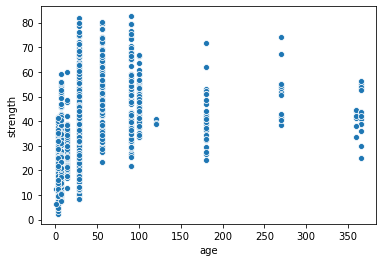

In [23]:
sns.scatterplot(concrete['age'],concrete['strength']);

In [10]:
bins = [0, 25,50,75,400]
labels =['0-25','25-50','50-75','75+']
concrete['age_binned'] = pd.cut(concrete['age'], bins,labels=labels)
print(concrete.groupby('age_binned')['strength'].median())
print(concrete.groupby('age_binned')['strength'].count())

age_binned
0-25     21.55
25-50    33.76
50-75    51.72
75+      44.21
Name: strength, dtype: float64
age_binned
0-25     324
25-50    425
50-75     91
75+      190
Name: strength, dtype: int64


We divide the age clumn into 4 buckets such that there is a variation in strength for each buckets as well as the count of records in each bucket is significant. We must label encode this variable to make it usable in the model

In [11]:
concrete['age_binned'].replace({'0-25':0,'25-50':1,'50-75':2,'75+':3}, inplace = True)

#### Ratios based on Industry Expertise
   1. Water to cement
   2. Water to binder
   3. Superplasticizer to binder

In [12]:
concrete['water_cement_ratio'] = concrete['water']/ concrete['cement']
concrete['water_binder_ratio'] = concrete['water']/ (concrete['slag']+ concrete['ash']+0.000001)
concrete['cement_binder_ratio'] = concrete['cement']/ (concrete['slag']+ concrete['ash']+0.000001)
concrete['superplastic_binder_ratio'] = concrete['superplastic']/ (concrete['slag']+ concrete['ash']+0.000001)
concrete['courseagg_fineagg_ratio'] = concrete['coarseagg']/ concrete['fineagg']
### Adding a small value to denomiator to avoid formation of null values

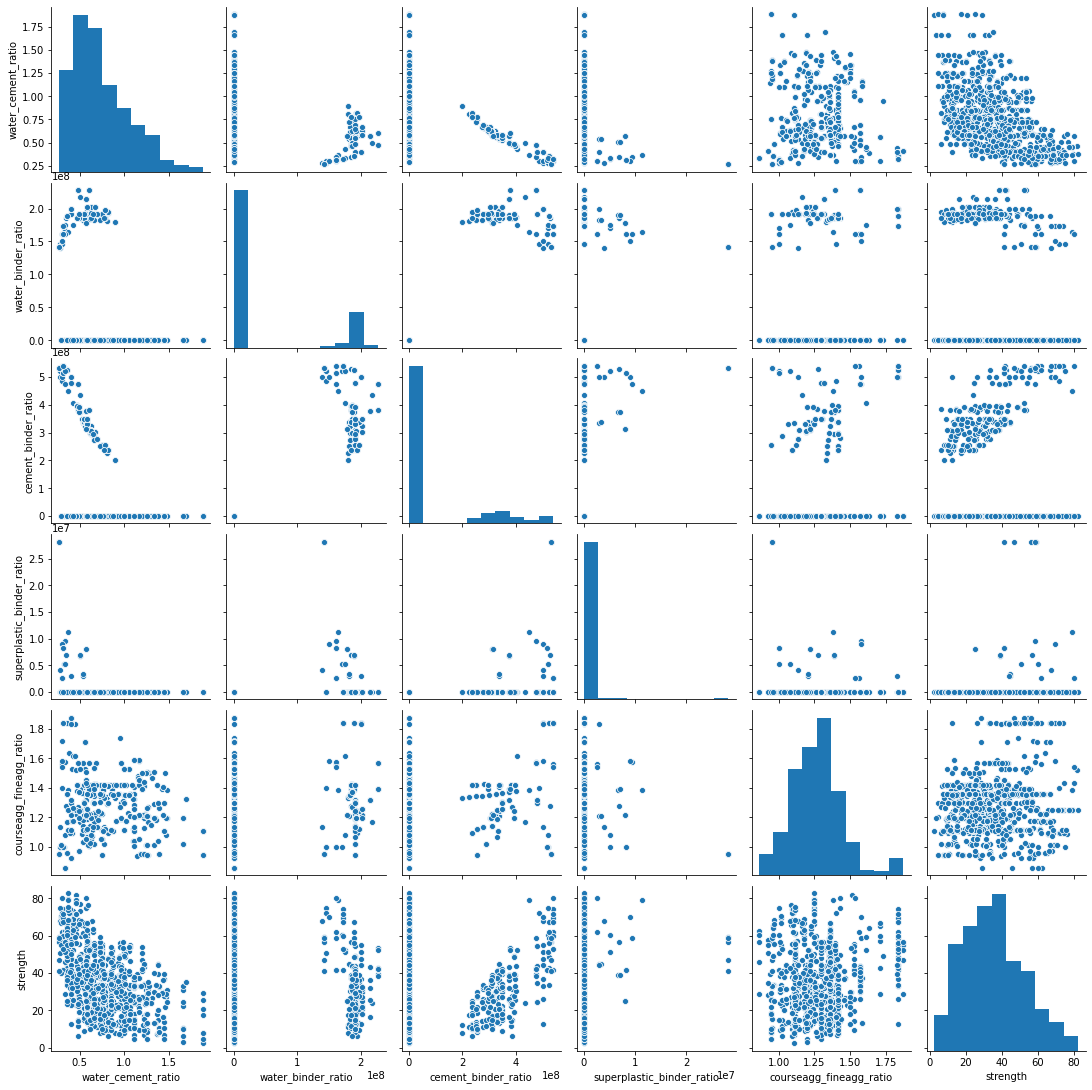

In [27]:
sns.pairplot(concrete[['water_cement_ratio','water_binder_ratio','cement_binder_ratio','superplastic_binder_ratio','courseagg_fineagg_ratio','strength']]);

##### Observations - 
- 'water_cement_ratio' and 'cement_binder_ratio' show a correlation with strength

### Predictive Modelling 

In [13]:
## Spliting Data into Train, Validation and Test
np.random.seed(10) 
train, validate, test = np.split(concrete.sample(frac=1), [int(.6*len(concrete)), int(.8*len(concrete))])

In [14]:
train.shape, validate.shape, test.shape

((618, 17), (206, 17), (206, 17))

In [15]:
X_train = train.drop(['strength'], axis =1)
y_train = train['strength']
X_val = validate.drop(['strength'], axis =1)
y_val = validate['strength']
X_test = test.drop(['strength'], axis =1)
y_test = test['strength']

##### Outlier Treatment

As seen in Univariate Analysis Section, the outliers are few in number and are close to the 1.5*IQR boundries of the boxplot. Replacing these outliers with the Median+1.5*IQR value to solve for outliers

In [16]:
def iqr(value, Q1,Q2,Q3,IQR):
    if value>(Q2+(1.5*IQR)):
         return Q2+(1.5*IQR )
    if value<(Q2-(1.5*IQR)):
         return (Q2-(1.5*IQR))
    else:
        return value

In [17]:
def outlier_replace(column):
    Q1 = column.quantile(0.25)
    Q2 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3-Q1
    column2 = column.apply(lambda x: iqr(x,Q1,Q2,Q3,IQR))
    return column2

In [18]:
## Replacing Outliers in all columns 
X_train = X_train.apply(lambda x: outlier_replace(x))
X_test = X_test.apply(lambda x: outlier_replace(x))
X_val = X_val.apply(lambda x: outlier_replace(x))

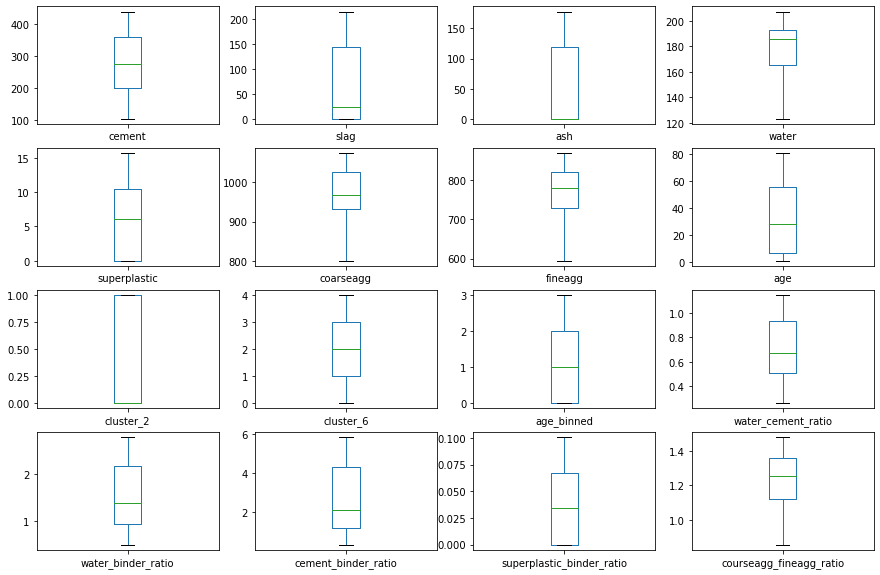

In [34]:
## Revisiting Training data boxplot to check if Outliers still remaining
X_train.plot.box(subplots =True, layout = (4,4), figsize = (15,10), sharex=False);

##### Feature Scaling 

In [19]:
### Scaling Variables 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
X_test_scaled = scaler.fit_transform(X_test)

##### Selecting Model Types 
Since we don't see much linear relationship among variables, we are going to try algorithms that capture non linear relationships among variables as follows -

1. SVM Regression
2. KNN
3. Decision Trees
4. Random Forest

In [20]:
regressors = {'SVM': SVR(),
               'KNN': KNeighborsRegressor(),
              'Decision Tree': DecisionTreeRegressor(random_state =1),
              'Random Forest' : RandomForestRegressor(random_state =1),
             }

In [21]:
model_score = pd.DataFrame(columns = ['Name','Test Score','Train Score'])
for  name in regressors:
    model = regressors[name].fit(X_train_scaled,y_train)
    pred = model.predict(X_test_scaled)
    score = mean_squared_error(pred,y_test)
    score_train = mean_squared_error(model.predict(X_train_scaled),y_train)
    model_score = model_score.append({'Name':name,'Test Score':score,'Train Score':score_train}, ignore_index =True)
model_score

,Name,Test Score,Train Score
0,SVM,102.196236,78.517722
1,KNN,79.400865,43.009873
2,Decision Tree,103.251518,0.508465
3,Random Forest,46.761748,4.092119


##### Observations
 - On experimenting with 4 machine learning algorithms that can be used to identify and predict non-linear trends well, we see that Random Forest Ensemble technique has the least mean square error in the test dataset. Thus we would use Random Forest model for predicting 
 - We also observe that the difference in Train MSE and Test MSE is large, indicating overfitting of model. We would need to tune the hyperparameters of the Random Forest Model to avoid overfitting
 - We could also use the feature importances generated by Random Forest model to further shortlist important features 

##### Feature Selection using Random Forest Feature Importance 

In [22]:
features = pd.DataFrame((model.feature_importances_),index = X_train.columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
features

,Importance
water_cement_ratio,0.370306
age,0.238337
age_binned,0.105121
slag,0.064971
cement,0.041395
water_binder_ratio,0.033936
water,0.032129
fineagg,0.025078
coarseagg,0.021944
superplastic,0.019790


##### Observations
 - Water to Cement Ratio is the most important variable for predicting compression strength
 - Both the clustering variables do not add any significant information to the model and can be removed
 - Removing all variables with less than 1% feature importance

In [23]:
## Selecting Shortlisted Features
shortlisted_features = features[features['Importance']>0.01].index
X_train_scaled_shortlist = pd.DataFrame(X_train_scaled, columns = X_train.columns)[shortlisted_features]
X_test_scaled_shortlist = pd.DataFrame(X_test_scaled, columns = X_test.columns)[shortlisted_features]
X_val_scaled_shortlist = pd.DataFrame(X_val_scaled, columns = X_val.columns)[shortlisted_features]

In [24]:
## Re-Training model with new subset of features
model = RandomForestRegressor(random_state =1).fit(X_train_scaled_shortlist,y_train)
pred = model.predict(X_test_scaled_shortlist)
score = mean_squared_error(pred,y_test)
score_train = mean_squared_error(model.predict(X_train_scaled_shortlist),y_train)

In [41]:
print(score,score_train)

47.75233532298668 4.209588714990063


Despite removing variables, the test performance remains similar. This shows that the remaining variables were adding noise to the data. However, we still see overfitting in the model and would need to perform hyperparameter tuning

### Hyperparameter Tuning 
Following are the list of hyperparameters in the model that could be tuned to solve for overfitting - 
1. n_estimators
2. criterion
3. max_depth
4. min_samples_split
5. min_samples_leaf
6. oob_score

In [25]:
model = RandomForestRegressor(random_state =1).fit(X_train_scaled_shortlist,y_train)
model

RandomForestRegressor(random_state=1)

In [26]:
param_dist = {'n_estimators': [100,300],
              'criterion': ['mse'],
              'max_depth': randint(1,10),
              'max_features': randint(1,11),
              'min_samples_split': randint(10,30),
              'min_samples_leaf': randint(1,20),
             'oob_score' : ['True'] }
sample = 20 ## Number of samples to be drawn from Hyperparameter space
random_cv = RandomizedSearchCV(model,param_distributions =param_dist, n_iter = sample,cv = 10, verbose = False, random_state =1)
random_cv.fit(X_val_scaled_shortlist, y_val)
random_cv.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100,
 'oob_score': 'True'}

We obtain the best parameters based on Randomized Search Cross Validation. Now using these paramters, we train our model on the train dataset

In [44]:
## Training Model after hyperparameter Tuning
model = RandomForestRegressor(random_state = 1, n_estimators = 100,
              criterion= 'mse',
              max_depth= 8 ,
              max_features=7,
              min_samples_split= 10,
              min_samples_leaf= 2,
             oob_score = True).fit(X_train_scaled_shortlist,y_train)

In [45]:
pred = model.predict(X_test_scaled_shortlist)
score_test = mean_squared_error(model.predict(X_test_scaled_shortlist),y_test)
score_val = mean_squared_error(model.predict(X_val_scaled_shortlist),y_val)
score_train = mean_squared_error(model.predict(X_train_scaled_shortlist),y_train)
print(pd.DataFrame([score_test,score_val,score_train], index = ['Test Score','Validation Score','Train Score'], columns = ['MSE']))

                        MSE
Test Score        49.878795
Validation Score  47.376305
Train Score       14.970534


- We see that the test and validation datasets have an MSE of around 47 to 50. 
- Also the difference between train and test dataset has reduced, indicating that there is lesser overfitting

##### 95% Confidence Interval for Model Performance
Computing cross validation score on test data to calculate 95% confidence range for performance 

In [46]:
cv = KFold(n_splits=5, random_state=10, shuffle=True)
cv_score = cross_val_score(model, X_test_scaled_shortlist, y_test, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
print ("The CV Accuracy = ",(cv_score*-1).mean())

The CV Accuracy =  70.03746619890632


In [49]:
## Computing 95% Confidence Interval
mean = (cv_score*-1).mean()
std = ((cv_score).std())
upper_limit = mean+(2*std)
lower_limit = mean-(2*std)
print("The 95% confidence range for test MSE values lies in [",lower_limit,",",upper_limit,"]")

The 95% confidence range for test MSE scores lies in [ 26.331491401370315 , 113.74344099644232 ]


### Summary and Conclusion

- We used 9 features specific to concrete composition along with some engineered features using - Clustering, Binning of Continous variables and Ratios to predict the compression strength
- Random Forest Model showed best performance on test data among the remaining ML techniques explored (SVM, KNN and Decision Trees)
- We shortlisted top important features using the Feature Importance generated by Random Forest Algorithm
- Conducted Hyperparameter Tuning on Validation dataset and redeveloped the model with refined hyperparameters
- The final model is expected to have an MSE in the range  [26.331491401370315 , 113.74344099644232]  with 95% confidence